# Euler/Verlet

## Library Imports Go Here

In [9]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import random

## Basic Euler Method

### Building the Algorithm

<font color = blue>
Construct an algorithm that implements the basic Euler method to solve the first order differential equation

$$
\frac{dx}{dt} = F((x(t), t)
$$

It should take as inputs the function $F$ (assumed to be of two variables), the initial value $x_0$, the step size $\Delta t$, and the total number of steps $N$.  It should output two lists of $N+1$ elements, the first of which is of the form $\{t_n\}$ with first element $0$, and the second of which is of the form $\{x_n\}$, with first element $x_0$.

In [10]:
def eeeyouler(F,x_not,dt,N):
    time_vals = np.arange(0,(N+1)*dt,dt)
    #make array, change values later for the sake of time - all of time. The entire rest of the time stream will be plagued unless this right here is stopped.
    f_vals = np.array([x_not]*(N+1))
    for i in range(N):
        f_vals[i+1] = f_vals[i] + (dt * F(f_vals[i],time_vals[i]))
    if isinstance(x_not,array_like):
        #sepparating out position and velocity for easy graphing
        x = np.array([f_vals[i][0] for i in range(len(f_vals))])
        v = np.array([f_vals[i][1] for i in range(len(f_vals))])
        return np.array([time_vals, x, v])
    else:
        return np.array([time_vals, f_vals])
        

### Initial Testing

<font color = blue>
Consider the differential equation

$$
\frac{dx}{dt} = -x
$$

with the initial condition $x_0 = 10$.

First, determine the analytic soution to this differential equation (show your work.)

Then, use a step size of $\Delta t = 0.01$, and carry the solution out to $N = 1000$ steps.  

Finally, plot the two together, and visually confirm that they agree.

this is first order and SEPERABLE! So: $$ \frac{dx}{dt} = -x $$ \
$$\Rightarrow \int_{x_0}^{x} \frac{dx}{x} = -\int_{t_0}^t dt $$ \
$$\Rightarrow ln(|x|)-ln(x_0) = ln \Big(\frac{|x|}{x_0} \Big) = -(t - t_o) $$ \
$$\Rightarrow x(t) = x_oAe^{-t} $$ and if $t_o = 0$, then $ x(t) = x_oe^{-t} $

NameError: name 'array_like' is not defined

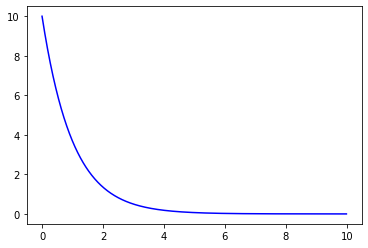

In [11]:
def solooshun(x_o,t):
    return float(x_o) * math.exp(-t)

def test(x,t):
    return -x

#setup
N=1000
dt=1/100
time_vals = np.arange(0,N*dt,dt)

#plotting the theoretical in blue
plt.plot(time_vals,np.array([solooshun(10.0,t) for t in time_vals]),color='blue')
euler_approx = eeeyouler(test,10.0,0.01,1000)

#plotting the aproximation in red dotted lines
plt.plot(*euler_approx,color='red',linestyle='--')
plt.show()



### Examining Global Error

<font color = blue>
Next, we will use the differential equation

$$
\frac{dx}{dt} = t
$$

to test the accumulated global error in the Euler method, which is in principle $\mathcal{O}(\Delta t)$.  This is, again, a differential equation you can quickly solve by hand.  It is also a problem where the results of using the Euler methd are possible to predict exactly.

What we want to do is compare the analytic result for $x(1)$ ($x$ evaluated at $t = 1$) with the numerical one generated by the Euler method for a particular step size $\Delta t = \frac{1}{N}$, where $N$ is the total number of steps.

In this case, not only is it possible to solve the differential equation analytically, it is also possible to work out exactly what the discrete answer will be after $N$ steps with step size $\Delta t$.  Our goal here is to do this, and confirm that our code behaves as expected.

<font color = blue>
First, Solve the differential equation analytically, assuming initial condition $x_0 = 0$ (and show your work.)  Determine what $x(1)$ is. 

again (even though tis very not needed), SEPARATION OF VAIABLES, with $x_0 = 0$ and $t_0 = 0$: 
    $$ \frac{dx}{dt} = t $$\
    $$ \Rightarrow \int_{x_0}^x dx = \int_{t_0}^t t dt $$\
    $$ \Rightarrow x - x_0 = \frac{t^2}{2}-\frac{t_0^2}{2} $$\
    $$ \Rightarrow x(t) = \frac{t^2}{2}, x(1) = \frac{1}{2} $$

<font color = blue>
Next, determine analytically what the Euler method applied to this differential equation should give for $x_N$, with $N = \frac{1}{\Delta t}$ (this is the Euler method evaluated at $t = 1$).  Based on this, determine what the discrepancy should be at $t = 1$ between the analytic solution and the numerical one.

so $ x(0) = 0 $: $$ x_1 = x(t_1) = x\Big(\frac{1}{N}\Big) = x_0 + \Big(dt*t_0\Big) = x_0 + \Big(\frac{1}{N}*\frac{0}{N}\Big) = x_0 + 0$$\
$$ x_2 = x\Big(\frac{2}{N}\Big) = x_1 + \Big(dt*t_1\Big) =  x_1 + \Big(\frac{1}{N}*t_1\Big) = x_0  + \Big(\frac{1}{
N}*\frac{1}{N}\Big) =  x_0  +\frac{1}{N^2}$$\
$$ x_3 =x\Big(\frac{3}{N}\Big) = x_2 + \Big(dt*t_2\Big) =  x_2 + \Big(\frac{1}{N}*t_2\Big) = x_2  + \Big(\frac{1}{N}*\frac{2}{N}\Big) =  x_0  +\frac{1}{N^2} + \frac{2}{N^2} $$\
$$ x_3 =  x_0  +\frac{1}{N^2} + \frac{2}{N^2} + \frac{3}{N^2} = x_0 + \frac{1}{N^2}*(1+2+3)$$

$$ x(N/N) = x_0 + \Big(\frac{1}{N^2} *\frac{N(N+1)}{2}\Big) = x_0 + \frac{1}{2} + \frac{1}{2N}$$\
so  $x(1) = 0 + \frac{1}{2} + \frac{1}{2*N}$  where here the actual value should be  $x(1) = \frac{1}{2}$ , the euler method has an error of $\frac{1}{2N}$.

<font color = blue>
Finally, create a function that takes as its input just $N$, and outputs the magnitude of the difference $\delta$ between the analytic solution $x(1)$ and the numerical approximation to it.  Use this to generate data for $\Delta t$ vs. $\delta$ with $N$ in the range $[10, 1000]$ and then plot the results.  Are they consistent with the expected global error behavior?

In [13]:
def expected_error(N):
    return 1/(2*N)

def test2(x,t):
    return t

def functional_error(N):
    approximation = eeeyouler(test2,0.0,1/N,N)
    #returning the difference between the calculated and the expected.
    return abs(approximation[-1][-1]-0.5)

n_vals = np.array(range(10,1000))
error_vals = np.array([functional_error(n) for n in n_vals])
#expected in Blue
plt.plot(n_vals,np.array([expected_error(n) for n in n_vals]), color ='blue')
#Actual in Red dashes
plt.plot(n_vals, error_vals,color='red',linestyle='--')

NameError: name 'array_like' is not defined

## Instability in the Euler Method

### Euler for a Second Order Differential Equation

<font color = blue>
Use the Euler algorithm to find a numerical solution to the second order differential equation

$$
\frac{d^2x}{dt^2} = -4\pi^2 x \, ,
$$

with the initial conditions $x_0 = 1$, $v_0 = 0$.  Set $\Delta t = 0.01$, and $N = 500$.  

Hint: if used correctly, you should be able to use the same code from the first part of this assignment to solve this *second order* differential equation!

Find the analytic solution with these initial conditions as well, and plot the two together.

Analytic solution with anzatz of $x(t) = A Sin(kt) + B Cos(kt)$, with $v(0) = 0$ causing A = 0:
   $$ \frac{d^2x}{dt^2} = - 4 \pi^2 x \; dt $$\
   $$ x(t) =  B Cos(kt) $$\
   $$ \frac{d^2x}{dt^2} = -Bk^2Cos(kt) = - 4 \pi^2 x(t)  $$\
   $$ Bk^2 = 4 \pi^2 $$\
   $$ x(0) = 1, B=1  \;   \;  x(t) = Cos(2\pi t) $$
   

The two first order eqns used will be: $$ \frac{dx}{dt} = v $$
$$ \frac{dv
}{dt} = -4\pi^2x $$

In [14]:
def analytical(t):
    return math.cos(2*math.pi*t)

def F(f,t):
    return np.array([f[1],-4*math.pi**2*f[0]])

N=500
dt=0.01

#I couldn't quite incorporate this into the normal Euler function
def array_euler(F,x_not,dt,N):
    time_vals = np.arange(0,(N+1)*dt,dt)
    #make array, change values later for the sake of time - all of time. The entire rest of the time stream will be plagued unless this right here is stopped.
    f_vals = np.array([x_not]*(N+1))
    for i in range(N):
        change = (dt * F(f_vals[i],time_vals[i]))
        f_vals[i+1] = f_vals[i] + change
    #sepparating out position and velocity for easy graphing
    x = np.array([f_vals[i][0] for i in range(len(f_vals))])
    v = np.array([f_vals[i][1] for i in range(len(f_vals))])
    return np.array([time_vals, x, v])


x_vals = eeeyouler(F,np.array([1.0,0.0]),dt,N)[1]
time = np.arange(0,(N+1)*dt,dt)
#original Function
plt.plot(time,np.array([analytical(n) for n in time]))
#Euler Approximation
plt.plot(time,x_vals,color='red',linestyle='--')


NameError: name 'array_like' is not defined

The red increasing in amplitude is an example of the error of the Euler function blowing up, as this will comtinute increacing infinitely. 

### Dependence on $\Delta t$

<font color = blue>
Decrease the value of $\Delta t$ by a factor of 2.  Confirm that while over the same time scale used above we see less growth, if we double the time scale the amount of growth is comparable.

In [15]:
#original Function
plt.plot(time,np.array([analytical(n) for n in time]))

#normal time scale
data = array_euler(F,np.array([1.0,0.0]),dt,N)
plt.plot(data[0],data[1],color='orange',linestyle='-.')

#larger time scale
data = array_euler(F,np.array([1.0,0.0]),dt*2,251)
plt.plot(data[0],data[1],color='red',linestyle='--')


TypeError: 'module' object is not iterable

The origional function is in blue, and the larger time scale is in red. This outcome makes sense, using a finer mesh of times creates less error. It still explodes, but the orange does more closely follow the origional function.

### Growth Correction

<font color = blue>
Add an artificial damping term to the original differential equation so that we have

$$
\frac{d^2x}{dt^2} = -4\pi^2x - 2\beta\frac{dx}{dt}
$$

as our differential equation.  Use the same initial conditions as in the previous section, and set $\Delta t = .01$ and $N = 500$.  Choose the value of $\beta$ so that the damping cancels out the parasitic growth of the numerical solution.  Again plot the result against the analytic solution -- not to this differential equation but to the original equation studied above.

$$ \frac{dx}{dt} = v $$
$$ \frac{dv}{dt} = -4\pi^2x - 2 \beta v $$

In [16]:
#original Function
plt.plot(time,np.array([analytical(n) for n in time]))

def fixed_F(f,t):
    beta = 0.2
    return np.array([f[1],-4*math.pi**2*f[0]- 2*beta*f[1]])

data = array_euler(fixed_F,np.array([1.0,0.0]),dt,N)
plt.plot(data[0],data[1],color='red',linestyle='--')

TypeError: 'module' object is not iterable

Its satisfying to try a value and finally nail the damping offset value.

## The Pendulum

<font color = blue>
Consider the system (which does not have an analytic solution)

$$
\frac{d^2\theta}{dt^2} = -\sin\theta - 2\beta\dot{\theta}
$$

which represents a pendulum with a damping term.  (The system has been suitably non-dimensionalized, so that the dimensionful fator $\frac{g}{\ell}$ which would usually appear in front of the $\sin\theta$ has been absorbed into a redefinition of time.  The damping factor $\beta$ has also been rescaled to be dimensionless.)  We are actually interested in the simple pendulum without the damping term, but as in the previous section, we will need to introduce an artificial damping term to counteract the parasitic numerical growth.

$$ \frac{d\theta}{dt} = \omega $$\
$$ \frac{d\omega}{dt} = -sin(\theta) - 2\beta\omega$$

### Growth

<font color = blue>
First attempt to solve the system numerically with $\beta = 0$, using initial conditions $\theta_0 = 1$ and $\dot{\theta}_0 = 0$.  Confirm that, as usual, we obtain un-physical growth of the solution.  Use $\Delta t = 0.01$ and $N = 30000$.  Graph your results, and include horizontal lines at $\theta = \pm \pi$.  What happens around $t = 270$?  (Hint: think about the possible ways in which a rigid rod pendulum can move.)

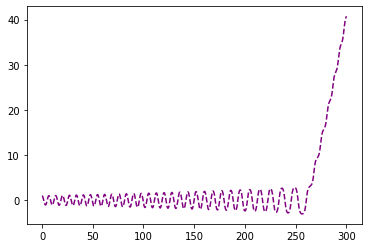

In [17]:
N=30000
dt = 0.01
beta = 0
init = np.array([1.0,0.0])

def pendulum(f,t):
    return np.array([f[1],- math.sin(f[0]) - 2*beta*f[1]])

pendata = array_euler(pendulum,init,dt,N)
plt.plot(pendata[0],pendata[1],color='purple',linestyle='--')

This plot displays what the several preceding it do not, but would exhibit eventually- the function going off to infinity and the error becoming infinite. I'm impressed with how close the error was for the initial 50 seconds, though. It seems at 270 seconds the pendulum's movement becomes all in one angular direction, spinning around and around the same way ad nauseam and infinitum.

### Correction

<font color = blue>
Determine (by trial and error) a value $\beta$ that, when used in the damped pendulum differential equation ends up canceling out the numerical growth exactly so that we obtain a numerical solution that is something like an "undamped pendulum".  Use the same initial conditions as in the previous part.

Then, use the initial conditions $\theta_0 = 0.5$ and $\dot{\theta}_0 = 0$, and repeat the exercise.  What happens to the necessary value of $\beta$?  What does that mean for the value of the "artificial damping correction" technique for fixing the Euler method?

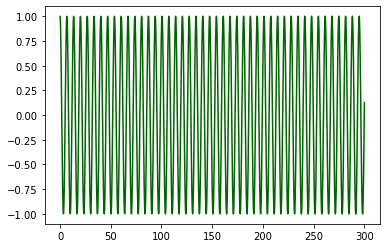

In [18]:
beta = 0.0044
init = np.array([1.0,0.0])
pendata = array_euler(pendulum,init,dt,N)
plt.plot(pendata[0],pendata[1],color='darkgreen')

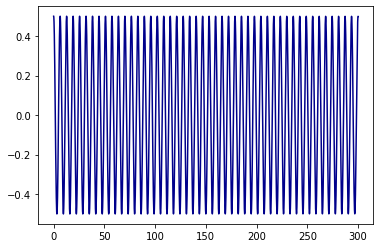

In [19]:
beta = 0.00485
init = np.array([0.5,0.0])
pendata = array_euler(pendulum,init,dt,N)
plt.plot(pendata[0],pendata[1],color='darkblue')

the nessesary damping increaces in orger to offset the error, meaning that error would grow faster if unchecked. This also insinuates that the error growth is based upon the magnitude fo the function.

## The Verlet Function

<font color = blue>
The Verlet method is designed to solve a second order differential equation, in the form

$$
\frac{d^2x}{dt^2} = F(x, \dot{x}, t)
$$

### Basic Code

<font color = blue>
Create a function that will implement the Verlet method.  Your code should input a function in the form $F(x, v, t)$, initial conditions $x_0$ and $v_0$, a step size $\Delta t$ and a total number of steps $M$.  It should output a pair of lists: times $\{t_n\}$ and positions $\{x_n\}$.

In [20]:
def valery(F,x_not,v_not,N,dt):
    # setting up variables to change in the for loop, 'next' reffering to the next to be used
    x_neg = x_not - (v_not*dt)
    v_next = v_not
    F_next = F(x_not,v_not,0)
    time_ball = np.arange(0,(N+1)*dt,dt)
    #making the array before adding to it, starting with [x_-1, x_0, ...]
    wibbly_wobbly = np.array([x_neg]*(N+1))
    wibbly_wobbly[1] = x_not
    for stuff in range(1,N):
        nextVal =2*wibbly_wobbly[stuff] - wibbly_wobbly[stuff-1] + F_next*dt**2
        #print(nextVal)
        wibbly_wobbly[stuff+1] = nextVal
        v_next = ( nextVal - wibbly_wobbly[stuff] ) / dt
        F_next = F(nextVal,v_next,time_ball[stuff])
    #Bad Wolf
    return time_ball,wibbly_wobbly
        

### Testing the Code

<font color = blue>
Test your code using the (dimensionless) equation for relativistic motion with a constant force:

$$
\frac{d^2x}{dt^2} = \left(1 - \left(\frac{dx}{dt}\right)^2\right)^{3/2}
$$

Choose $x_0 = v_0 = 0$, step size $\Delta t = 0.01$, and $M = 1000$ total steps.  Show the results together with a plot of the theoretical particle trajectory, which is

$$
x(t) = \sqrt{1 + t^2} - 1
$$

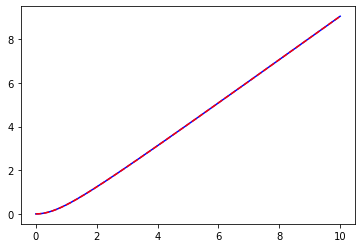

In [21]:
def test_func(x,v,t):
    return (1-v**2)**(3/2)

def actual_sol(t):
    return math.sqrt(1+t**2)-1

#actual values in blue solid line
N = 1000
dt = 0.01
time = np.arange(0,(N+1)*dt,dt)
plt.plot(time,np.array([actual_sol(q) for q in time]),color='blue')

#predicted values in red dashed line- I'm trying to make purple
produced = valery(test_func,0,0,N,dt)[1]
plt.plot(time,produced,color='red',linestyle='--')

### Discrepancies

<font color = blue>
A more effective way to examine way to examine the accuracy of a numerical method is to compute discrepancies.  Using the theoretical trajectory, compute the differences between the theoretical positions and the numerical positions, and display these in a plot.  Do this for $\Delta t= 0.01$ and $M = 1000$.  Then, repeat the process, using $\Delta t = 0.001$ and $M = 10000$.

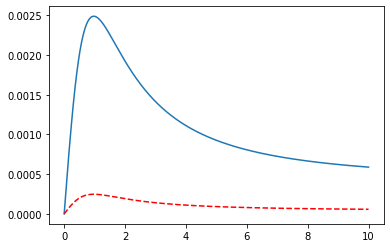

In [22]:
def discrep(dt,M):
    time = np.arange(0,(M+1)*dt,dt)
    return time, (np.array([actual_sol(q) for q in time]) - valery(test_func,0,0,M,dt)[1])


values = discrep(0.01,1000)
plt.plot(values[0],values[1])

values = discrep(0.001,10000)
plt.plot(values[0],values[1],color='red',linestyle='--')


This result makes sense; making the time step small is supposed to make the discrepancy smaller, as it decreaced the nessesary damping above.

## Relativistic Springs

<font color = blue>
The differential equation for the relativistic spring (in dimensionless form) is

$$
\ddot{x} = -x(1 - \dot{x}^2)^{3/2}
$$

### * Non-Relativistic Limit

<font color = blue>
Create a plopt showing position vs. time in the relativistic spring system for the initial conditions $v_0 = 0$, $x_0 = .01$, together with a plot of the non-relativistic analytic result.  Use $\Delta t = 0.001$, and $M = 100000$.

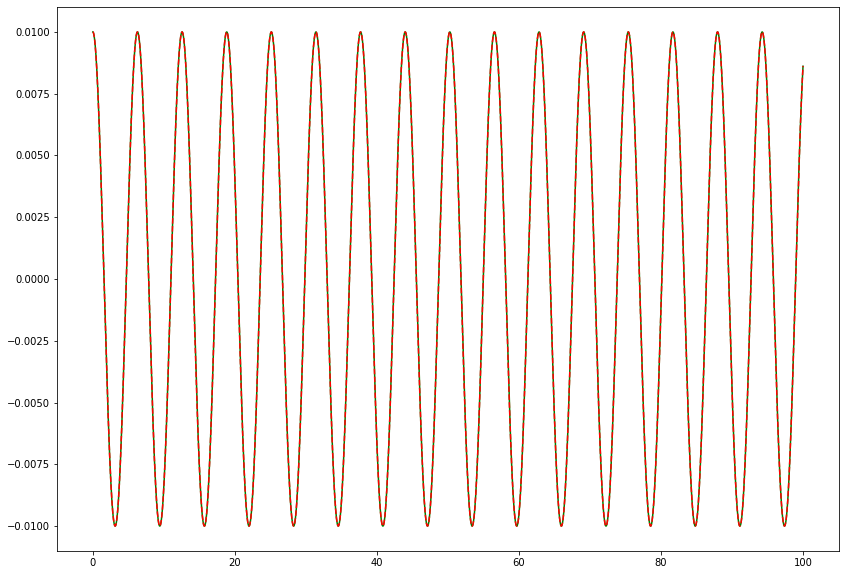

In [23]:
#relativistic spring in dimensionless form
def winter(x,v,t):
    return -x*(1-v**2)**(3/2)

#any normal SHO system- or maybe  the NQM-NR-ND-NDr-SHO
def spring(x,v,t):
    return -x

dt=0.001
N=100000
Rel=valery(winter,0.01,0,N,dt)
#print(len(Rel[0]))
Norm=valery(spring,0.01,0,N,dt)

plt.figure(figsize=(14,10))
plt.plot(Rel[0],Rel[1],color='green')
plt.plot(Norm[0],Norm[1],color='red',linestyle='--')

At low displacements, as proven in class, the relativistic SHO folows the form of any simple non-relativistic SHO. The maximum magnitudes here are 0.01, fairly small, and their velocities corresond to c, which woudl also be small at this point.

### * Highly Relativistic Limit

<font color = blue>
Now create a plot of position vs. time with the initial conditions $v_0 = 0$ and $x_0 = 10.0$.  In this case your don't have to display the extreme relativistic limit on the plot (creating a triangle wave is a little annoying), but do show a vertical line at one "extreme relativistic period".  

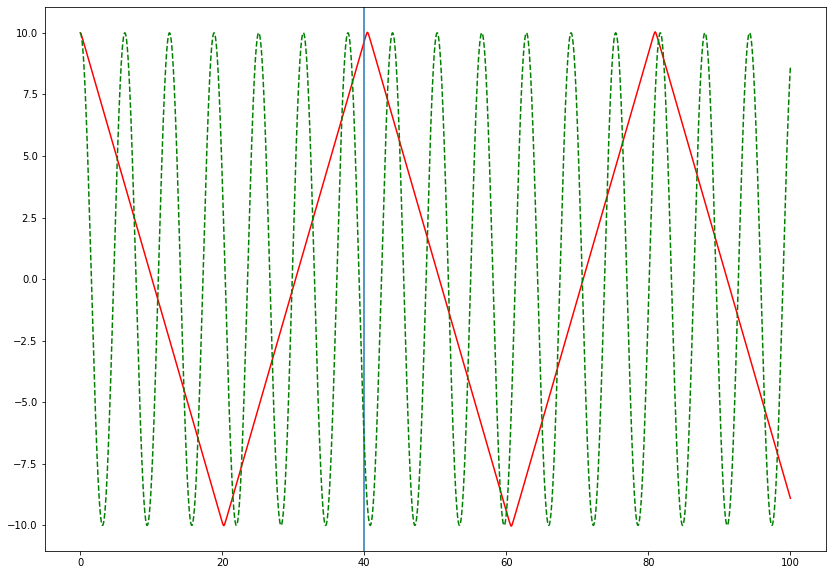

In [24]:
dt=0.001
N=100000
Rel=valery(winter,10,0,N,dt)
#print(len(Rel[0]))
Norm=valery(spring,10,0,N,dt)

plt.figure(figsize=(14,10))

#relativistic, angry pointy case
plt.plot(Rel[0],Rel[1],color='red')
#period line in blue
plt.axvline(4*10)
#non-relativistic, happy normal case
plt.plot(Norm[0],Norm[1],color='green',linestyle='--')

This is to be expected, the normal case's period stays the same becasue it has the option of speeding up with increased initial displacmenet, but the relativistic SHO can't move any faster and so its period increaces. Its period is marked by the blue line, equalling $4*a$. The value is slightly off because the is an approximation, the slope of the line being about $\frac{+}{-}1$ and so the period is almost $4*a$, a period of 1 corresponding to exacly the speed of light, c.

### * Multiple Position Graphs

<font color = blue>
Now create a single graph which include multiple different initial conditions: use $v_0 = 0$, but $x_0 \in \{0.1, 0.5, 1.0, 5.0, 10.0\}$.

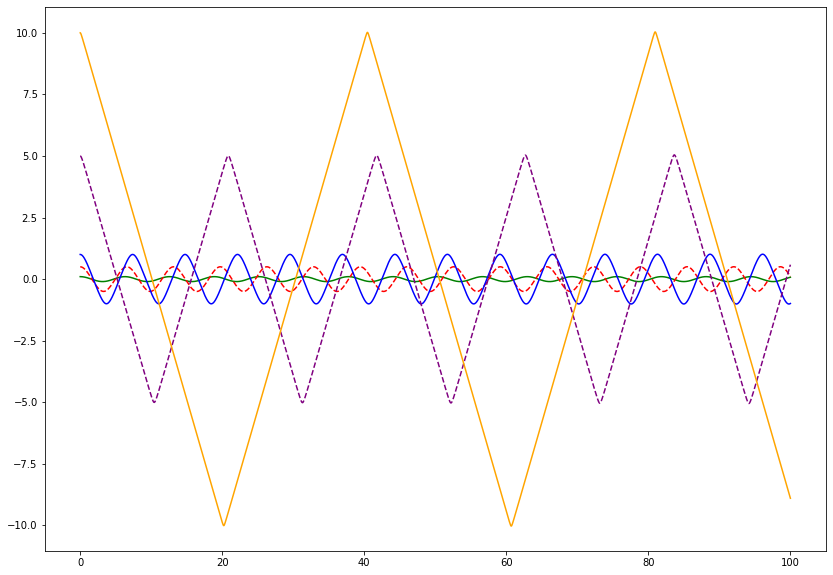

In [25]:
dt=0.001
N=100000
low=valery(winter,0.1,0,N,dt)
med_low=valery(winter,0.5,0,N,dt)
med=valery(winter,1.0,0,N,dt)
med_high=valery(winter,5.0,0,N,dt)
high=valery(winter,10.0,0,N,dt)

plt.figure(figsize=(14,10))
plt.plot(low[0],low[1],color='green')
plt.plot(med_low[0],med_low[1],color='red',linestyle='--')
plt.plot(med[0],med[1],color='blue')
plt.plot(med_high[0],med_high[1],color='purple',linestyle='--')
plt.plot(high[0],high[1],color='orange')

This shows how increased initial displacmenets both leads to larger periods and how a more triangle-wave like function is produced as the relativistic SHO shows more relativistic correction. The slopes correspond the to the speed of light, so the larger the amplitude will ahev aslope closer to 1.

### * Velocity Graphs

<font color = blue>
Use the lists of positions and times that you have just created to generate lists of velocities.  Create a single plot of these.

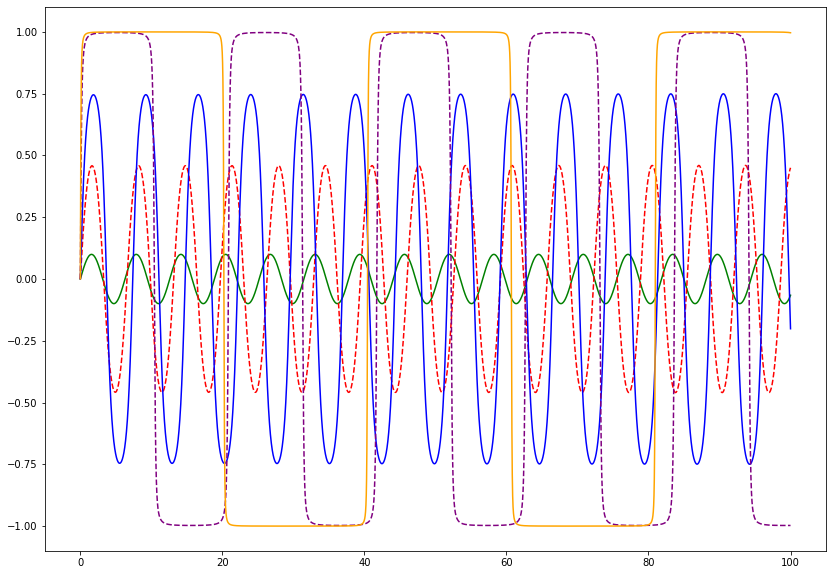

In [26]:
#return a list of velocities from the time and positions
def vel_from_pos(data):
    time = data[0]
    lst = data[1]
    return np.array([(lst[i-1]-lst[i])/(time[1] - time[0]) for i in range(1,len(lst))])


plt.figure(figsize=(14,10))
plt.plot(low[0][1:],vel_from_pos(low),color='green')
plt.plot(med_low[0][1:],vel_from_pos(med_low),color='red',linestyle='--')
plt.plot(med[0][1:],vel_from_pos(med),color='blue')
plt.plot(med_high[0][1:],vel_from_pos(med_high),color='purple',linestyle='--')
plt.plot(high[0][1:],vel_from_pos(high),color='orange')

This is a neat looking graph- the one close to a square wave is the function most closely approximating a high relativistic SHO, the slope of one equating to the speed of light, and as above this there is slight deviation from the theoretical highly relativistic limit's velocity, not producing a perfect square wave. If the initial displacement is raised dramatically, it gets closer and closer to the theoretical. 

## Any Other Problem

<font color = blue>
Come up with a physics problem (different from the ones analyzed above) that you can use the Verlet method to solve.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.

Speaking of Harmonic Oscillators, the Duffing equation is an enhancement of one that is sometimes used to show non-linear elasticity in solids, exhibiting chaos effects. Changing the value of the constants in this hamiltonian system can yeild several different SHO system models, making this a much more complete model of an SHO. The damping constant is $\delta$, with $\alpha >0$ it models a hardening spring, and when less than 0 this models a softening spring for small values of x. Altering $\beta$ below zero displays a point mass in a double well potential, regarded as a periodically forced beam that bends between two magnets. This is an example of when chaotic behavoir is displayed, and would also be called a van der Pol oscillator. Other possibilities are weakly nonlinear springs and weakly forcing functions, and Poincare sections are often observed within a set of constraints for chaotic attractors exhibiting periodic magitudes.

Here I'll give an example plot of each and its use, and I'll try to go into Poincare sections if there's time.

The full form of this system is: $$ \ddot{x} + \delta \dot{x} + \beta x + \alpha x^3 = \gamma cos(\omega t)$$

In [ ]:
alpha=0.5
delta=0.00
beta = .1
omega = 2
amplitude = 0
    
def duffing(x,v,t):
    return -delta*v - alpha*x - beta*x**3 + amplitude*math.cos(omega*t)

dt=0.001
N=20000

duff=valery(duffing,0,1,N,dt)
plt.figure(figsize=(15,5))
plt.plot(duff[0],duff[1],color='green')
plt.plot(duff[0][:-1],vel_from_pos(duff),color='red', linestyle = '-.')

This is an SHO, the red line showing velocity and the gree showing displacement.

In [ ]:
alpha=-0.5
delta=0.00
beta = .1
omega = 2
amplitude = 0

duff=valery(duffing,0,1,N,dt)
plt.figure(figsize=(15,5))
plt.plot(duff[0],duff[1],color='blue')
plt.plot(duff[0][:-1],vel_from_pos(duff),color='red', linestyle = '-.')

This is a softening spring SHO system, the blue showing displacement and the red dashed line plotting velocity. The plateaus of velocity aren't normally seen in an SHO, and this indicates that the moment when the displacment is low, the spring constant is not linear. The spring constant decreaces at low values, as can be seen compared to a normal velocity curve having its peak while the displacement is zero.

In [ ]:
alpha=0.5
delta=0.2
beta = .1
omega = 2
amplitude = 0

duff=valery(duffing,0,1,N,dt)
plt.figure(figsize=(15,5))
plt.plot(duff[0],duff[1],color='orange')
plt.plot(duff[0][:-1],vel_from_pos(duff),color='red', linestyle = '-.')

This is a damped SHO, an opposing force slowly diminishing the energy in the system.

In [ ]:
alpha=0.5
delta=0
beta = .1
omega = 1
amplitude = 1

duff=valery(duffing,0,1,2*N,dt)
plt.figure(figsize=(15,5))
plt.plot(duff[0],duff[1],color='purple')
plt.plot(duff[0][:-1],vel_from_pos(duff),color='red', linestyle = '-.')

This is a neat case of interferance, where the system is not damped, but is driven. That means there's a force with a known period acting on the system, and their interferance changes the amplotudes of displacement (purple) and velocity (red) accordingly. The highest/lowest values correspond to constructive/destructive interferance, accordingly.